# Colab-co-mod-gan-pytorch
Original tensorflow version: [zsyzzsoft/co-mod-gan](https://github.com/zsyzzsoft/co-mod-gan)

Pytorch version: [zengxianyu/co-mod-gan-pytorch](https://github.com/zengxianyu/co-mod-gan-pytorch)

1st Fork: [styler00dollar/Colab-co-mod-gan-pytorch](https://github.com/styler00dollar/Colab-co-mod-gan-pytorch)

In [23]:
import torch
import numpy as np
import random

SEED = 0

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [24]:
!nvidia-smi

Fri Jun  3 16:03:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.84       Driver Version: 460.84       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN Xp            On   | 00000000:05:00.0 Off |                  N/A |
| 23%   33C    P8    16W / 250W |   4067MiB / 12194MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            On   | 00000000:09:00.0 Off |                  N/A |
| 23%   

In [6]:
%cd ..

/tmp/pycharm_project_722


In [7]:
!sh ./download/places512.sh

--2022-06-03 12:00:04--  https://maildluteducn-my.sharepoint.com/:u:/g/personal/zengyu_mail_dlut_edu_cn/EQG9jJzkFLJDsOWmVJJSoqQB2jRDkXlYt3wnt9Fb9dJDsQ?download=1
Resolving maildluteducn-my.sharepoint.com (maildluteducn-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to maildluteducn-my.sharepoint.com (maildluteducn-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zengyu_mail_dlut_edu_cn/Documents/co-mod-gan-places2-050000.pth?ga=1 [following]
--2022-06-03 12:00:05--  https://maildluteducn-my.sharepoint.com/personal/zengyu_mail_dlut_edu_cn/Documents/co-mod-gan-places2-050000.pth?ga=1
Reusing existing connection to maildluteducn-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 319242563 (304M) [application/octet-stream]
Saving to: ‘EQG9jJzkFLJDsOWmVJJSoqQB2jRDkXlYt3wnt9Fb9dJDsQ?download=1’

EQG9jJzkFLJDsOWmVJJ 100%[===================>] 304.45M  15.3MB/s    in 23s     

2022-0

In [14]:
!sh ./download/data.sh

--2022-06-03 12:02:22--  https://maildluteducn-my.sharepoint.com/:u:/g/personal/zengyu_mail_dlut_edu_cn/Ed6KS2wg-olJsLicvZOpUHkB4nak9nYtJPXxwvM8W_d9PQ?download=1
Resolving maildluteducn-my.sharepoint.com (maildluteducn-my.sharepoint.com)... 13.107.138.9, 13.107.136.9
Connecting to maildluteducn-my.sharepoint.com (maildluteducn-my.sharepoint.com)|13.107.138.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zengyu_mail_dlut_edu_cn/Documents/places2sample1k_val.zip?ga=1 [following]
--2022-06-03 12:02:23--  https://maildluteducn-my.sharepoint.com/personal/zengyu_mail_dlut_edu_cn/Documents/places2sample1k_val.zip?ga=1
Reusing existing connection to maildluteducn-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 13048489 (12M) [application/x-zip-compressed]
Saving to: ‘Ed6KS2wg-olJsLicvZOpUHkB4nak9nYtJPXxwvM8W_d9PQ?download=1.1’

Ed6KS2wg-olJsLicvZO 100%[===================>]  12.44M  6.30MB/s    in 2.0s    

2022-06-03 12:

  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00034128.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00031855.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00010426.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00007957.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00024598.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00036270.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00012909.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00018847.png  
  inflating: datasets/places2sample1k_val/places2samples1k_256_mask_square128/Places365_val_00009935.png  
  inflating: datasets/places2sample1k

  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00014908.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00012063.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00008195.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00005234.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00032432.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00006583.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00016772.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00029538.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00031492.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00009569.jpg  
  inflating: datasets/places2sample1k_va

  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00018474.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00008851.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00006528.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00011366.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00006953.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00010659.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00017669.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00015949.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00016909.jpg  
  inflating: datasets/places2sample1k_val/places2samples1k_crop256/Places365_val_00017207.jpg  
  inflating: datasets/places2sample1k_va

Models: 
```
co-mod-gan-places2-050000.pth
co-mod-gan-ffhq-9-025000.pth # 512px
co-mod-gan-ffhq-10-025000.pth # 1024px
```

In [21]:
!mkdir -p datasets/places2sample1k_val/out

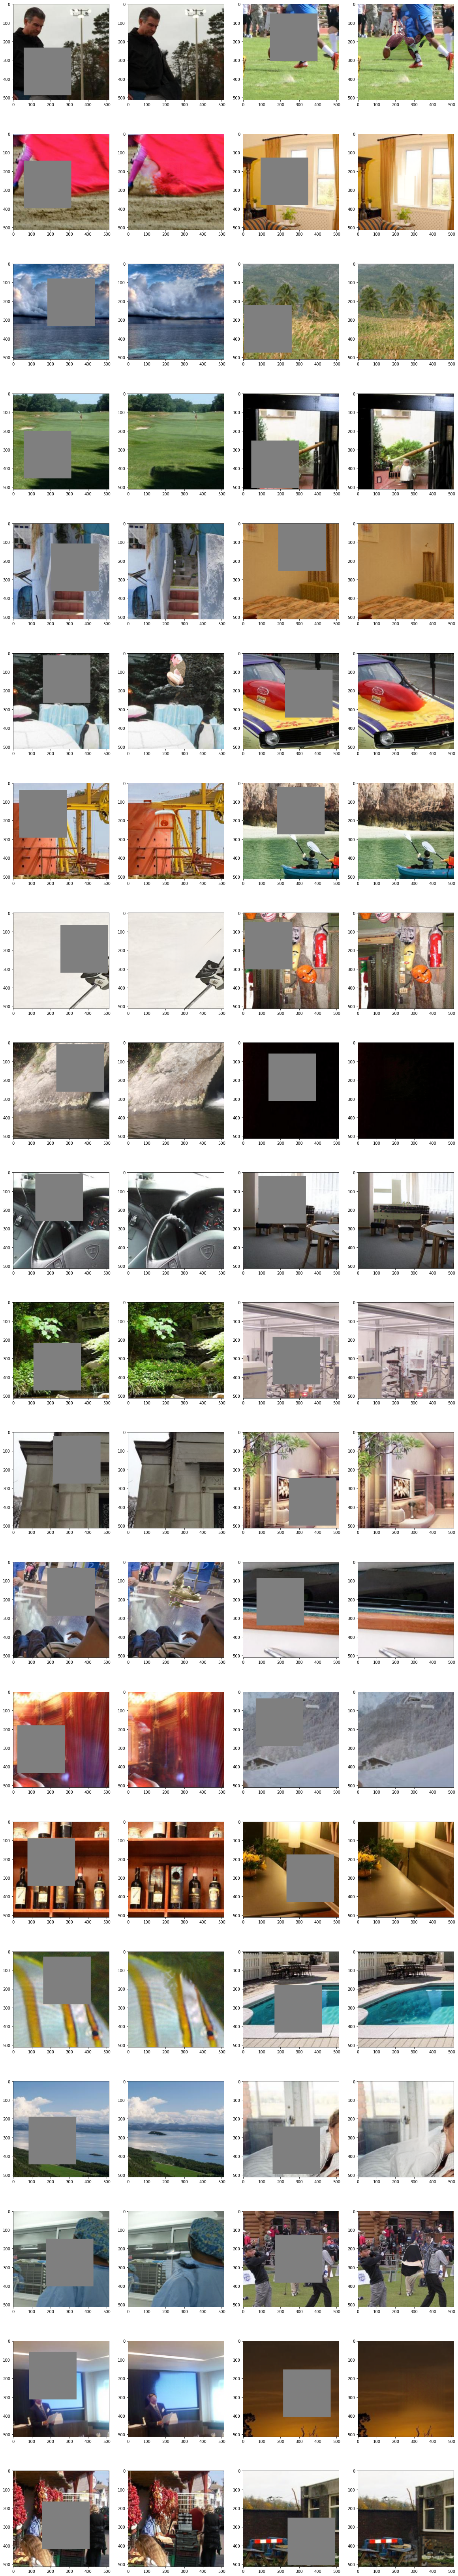

In [26]:
import argparse
import numpy as np
import torch
from co_mod_gan import Generator
from PIL import Image
import glob
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

MASKS_DIR = "datasets/places2sample1k_val/places2samples1k_256_mask_square128"
IMAGES_DIR = "datasets/places2sample1k_val/places2samples1k_crop256"

DEVICE = torch.device("cuda")

net = Generator()
net.load_state_dict(torch.load("checkpoints/co-mod-gan-places2-050000.pth"))
net.eval()
net = net.to(DEVICE)

def get_image_pairs(pairs_count=10):
    images = sorted(map(lambda x: f"{IMAGES_DIR}/{x}", os.listdir(IMAGES_DIR)))
    masks = sorted(map(lambda x: f"{MASKS_DIR}/{x}", os.listdir(MASKS_DIR)))
    out = list(zip(images[:pairs_count], masks[:pairs_count]))
    random.shuffle(out)
    return out

def get_image_tensor(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512,512), cv2.INTER_NEAREST)
    image = (torch.from_numpy(image).unsqueeze(0).permute(0,3,1,2)/255)*2-1
    image = image.to(DEVICE)
    return image

def display_tensor(result, ax=None):
    result = result.detach().cpu().numpy()
    result = (result+1)/2
    result = (result[0].transpose((1,2,0)))*255
    if ax:   
        ax.imshow(result.clip(0,255).astype(np.uint8))
        #ax.show()
    else:
        plt.imshow(result.clip(0,255).astype(np.uint8))
        plt.show()
    
def get_mask_tensor(mask_path):
    mask = cv2.imread(mask_path)
    mask = cv2.resize(mask, (512,512), cv2.INTER_NEAREST)
    mask = 1-np.all(mask == [255,255,255], axis=-1).astype(int)
    mask = torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()
    mask = mask.to(DEVICE)
    return mask

image_count = 40
assert image_count % 2 == 0
fig, axs = plt.subplots(image_count // 2, 4, figsize=(20, image_count * 3))
for i, (image_path, mask_path) in enumerate(get_image_pairs(image_count)):
    latents_in = torch.randn(1, 512)
    latents_in = latents_in.to(device)

    image, mask = get_image_tensor(image_path), get_mask_tensor(mask_path)
    display_tensor(image * mask, ax=axs[i // 2, (i % 2) * 2])
    result = net(image, mask, [latents_in], truncation=None)
    display_tensor(result, ax=axs[i // 2, (i % 2) * 2 + 1])